**Корректность проверена на Python 3.6:**
+ pandas 0.23.4
+ numpy 1.15.4
+ matplotlib 3.0.2
+ seaborn 0.9.0

# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

Это задание посвящено линейной регрессии. На примере прогнозирования роста человека по его весу мы увидим, какая математика за этим стоит.

**Материалы**

- Лекции данного курса по линейным моделям и градиентному спуску
- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib 
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn 

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [3]:
data = pd.read_csv('weights_heights.csv', index_col='Index')
print (data)

         Height    Weight
Index                    
1      65.78331  112.9925
2      71.51521  136.4873
3      69.39874  153.0269
4      68.21660  142.3354
5      67.78781  144.2971
...         ...       ...
24996  69.50215  118.0312
24997  64.54826  120.1932
24998  64.69855  118.2655
24999  67.52918  132.2682
25000  68.87761  124.8740

[25000 rows x 2 columns]


Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

**Пример.** Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

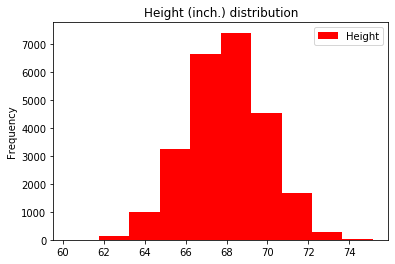

In [4]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

Посмотрим на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуем гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделаем гистограмму зеленой, подпишим картинку.

In [9]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


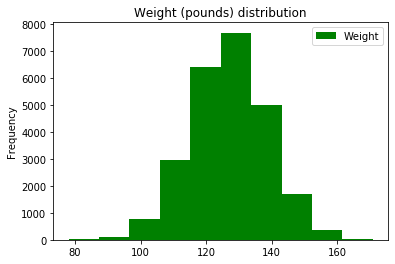

In [10]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (pounds) distribution')

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [5]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [6]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

Построим картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

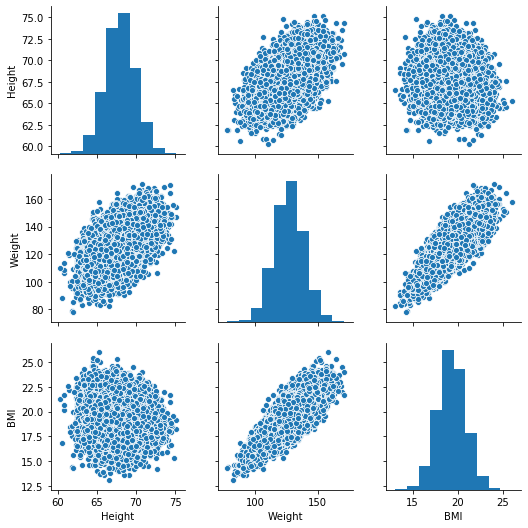

In [18]:
sns.pairplot(data)

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

Создадим в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используем метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишим ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

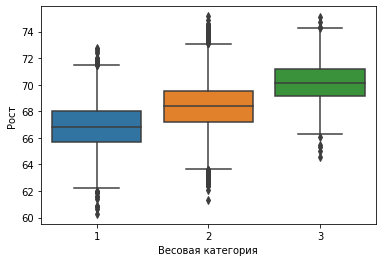

In [8]:
def weight_category(weight):
    pass
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
ax = sns.boxplot(x = "weight_cat", y="Height", data=data)
ax.set_xlabel('Весовая категория')
ax.set_ylabel('Рост')
plt.show()

Построим scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. 

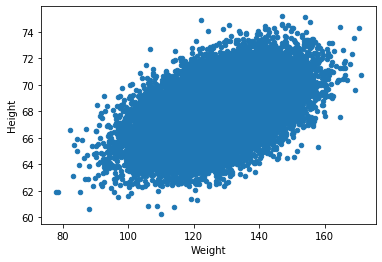

In [9]:
#plt.scatter( x = "Weight", y= "Height", data = data)
data.plot(x = "Weight", y= "Height", kind='scatter')

## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

Напишим функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [7]:
def error(w0, w1):
    s=0.
    x=data['Weight']
    y=data['Height']
    for i in range(1,(len(data.index)+1)):
        s+=(y[i]-(w0+w1*x[i]))**2
    return s

def f(w0,w1):
    return w0 + w1*x

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

Проведем на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишем оси и график.

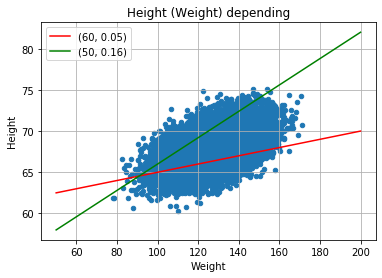

In [104]:
x = np.linspace(50,200)
data.plot(x = "Weight", y= "Height", kind='scatter', title='Height (Weight) depending')
#plt.scatter( x = "Weight", y= "Height", data = data)
plt.plot(x,f(60,0.05), 'r',label="(60, 0.05)")
plt.plot(x,f(50,0.16), 'g',label="(50, 0.16)")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Построим график зависимости функции ошибки, от параметра $w_1$ при $w_0$ = 50. Подпишем оси и график.

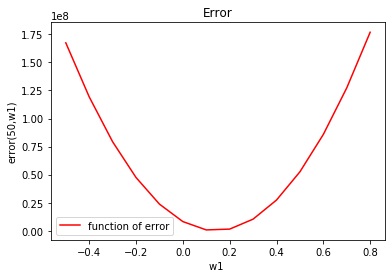

In [108]:
w = np.arange(-0.5, 0.83, 0.1)

err = [error(50,w1) for w1 in w]
plt.title('Error')
plt.xlabel('w1 ')
plt.ylabel('error(50,w1)')

plt.plot(w, err, color="red", label="function of error")
plt.legend()
plt.show()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

С помощью метода *minimize_scalar* из *scipy.optimize* найдем минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведем на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [109]:
import scipy
from scipy.optimize import minimize_scalar

def error50(w1):
    return error(50,w1)

res = minimize_scalar(error50, bounds=(-5,5), method='bounded')
print (res)
w1_opt = res.x
w1_opt

     fun: 79512.21728699488
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.1410920372883444


0.1410920372883444

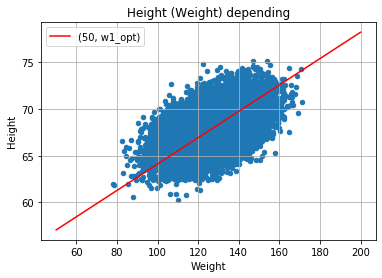

In [110]:
x = np.linspace(50,200)
data.plot(x = "Weight", y= "Height", kind='scatter', title='Height (Weight) depending')
#plt.scatter( x = "Weight", y= "Height", data = data)
plt.plot(x, f(50,w1_opt), 'r',label="(50, w1_opt)")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [9]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

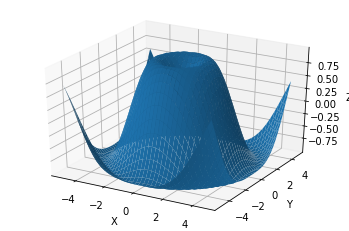

In [62]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Построим 3D-график зависимости функции ошибки, посчитанной от параметров $w_0$ и $w_1$. Подпишем ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

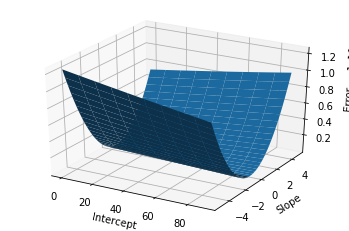

In [10]:
fig = plt.figure()
ax1 = fig.gca(projection='3d') # get current axis

w0 = np.arange(0, 100, 10)
w1 = np.arange(-5, 5, 0.25)
w0, w1 = np.meshgrid(w0, w1)
ER = error(w0, w1)
#f_err = lambda w0, w1: sum((data['Height'] - (w0 + w1*data['Weight'])) ** 2)
#ER = f_err

surf = ax1.plot_surface(w0, w1, ER)
ax1.set_xlabel('Intercept')
ax1.set_ylabel('Slope')
ax1.set_zlabel('Error')
plt.show()

С помощью метода *minimize* из scipy.optimize найдем минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используем метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведем на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишем оси и график.

In [96]:
def error1(w):
    s=0.
    x=data['Weight']
    y=data['Height']
    for i in range(1,len(data.index)):
        s+=(y[i]-w[0]-w[1]*x[i])**2
    return s

import scipy.optimize as optimize
min = optimize.minimize(error1, np.array([0,0]), method = 'L-BFGS-B', bounds=((-100,100),(-5, 5)))
print (min)
min.x


      fun: 67544.15205424865
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.02182787, -0.22118911])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([57.57154432,  0.08200797])


array([57.57154432,  0.08200797])

In [ ]:
#или так:
#y = np.array(data['Height'])
#x = np.array(data['Weight'])
#def error(w):
#    w0, w1 = w
#    res = 0
#    for i in range(len(data.index)):
#        err = (y[i]-(w0+w1*x[i]))**2
#    res += err
#    return res    
#from scipy.optimize import minimize
#bnds = ((-100, 100), (-5, 5))
#w = (0, 0)
#min_fun = minimize(error, w, method='L-BFGS-B', bounds = bnds)
#print (min_fun)

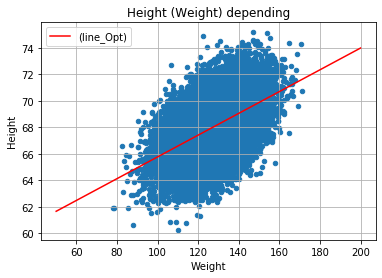

In [112]:
x = np.linspace(50,200)
data.plot(x = "Weight", y= "Height", kind='scatter', title='Height (Weight) depending')
#plt.scatter( x = "Weight", y= "Height", data = data)
plt.plot(x, f(min.x[0],min.x[1]), 'r',label="(line_Opt)")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()